## Final Project Submission

Please fill out:
* Student name: Mirriam Mumbua
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Diana Mongina
* Blog post URL:


# BUSINESS UNDERSTANDING
## Objective:
### The objective of this project is to develop a predictive model that accurately forecasts the future closing prices of a stock using historical stock market data. By leveraging time series analysis techniques or advanced machine learning models like ARIMA or LSTM, the goal is to capture patterns and trends in the historical data to make informed predictions about future stock prices. This will provide valuable insights for investors and traders to make data-driven decisions in the stock market.

# DATA UNDERSTANDING

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from zipfile import ZipFile
import os

# Specify the path to the zipped dataset
zip_file_path = './data/archive (2).zip'

# Unzipping the dataset
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('data')

# Loading the dataset
csv_file_path = './data/google_stock_data.csv'
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe
print(df.head())


         Date       Open       High        Low      Close  Adj Close  \
0  2010-01-04  15.689439  15.753504  15.621622  15.684434  15.684434   
1  2010-01-05  15.695195  15.711712  15.554054  15.615365  15.615365   
2  2010-01-06  15.662162  15.662162  15.174174  15.221722  15.221722   
3  2010-01-07  15.250250  15.265265  14.831081  14.867367  14.867367   
4  2010-01-08  14.814815  15.096346  14.742492  15.065566  15.065566   

      Volume  
0   78169752  
1  120067812  
2  158988852  
3  256315428  
4  188783028  


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563 entries, 0 to 3562
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3563 non-null   object 
 1   Open       3563 non-null   float64
 2   High       3563 non-null   float64
 3   Low        3563 non-null   float64
 4   Close      3563 non-null   float64
 5   Adj Close  3563 non-null   float64
 6   Volume     3563 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 195.0+ KB


### There are 3,563 rows in your dataset.The dataset contains 7 columns: Date, Open, High, Low, Close, Adj Close, and Volume.Date is an object (string) type. Meaning we'll have to change it to date dtype. Open, High, Low, Close, and Adj Close are float64 types. Volume is an int64 type. All columns have 3,563 non-null values, meaning there are no missing values in your dataset.

In [202]:
#converting the date to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

0   2010-01-04
1   2010-01-05
2   2010-01-06
3   2010-01-07
4   2010-01-08
Name: Date, dtype: datetime64[ns]

In [203]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3563,3563.000000,3563.000000,3563.000000,3563.000000,3563.000000,3.563000e+03
mean,2017-01-29 17:24:44.254841088,55.111820,55.680919,54.551089,55.130651,55.130651,5.790185e+07
min,2010-01-04 00:00:00,10.968719,11.068068,10.851602,10.912663,10.912663,9.312000e+06
25%,2013-07-18 12:00:00,22.022022,22.191566,21.886762,22.029530,22.029530,2.825300e+07
50%,2017-01-31 00:00:00,41.549999,41.861500,41.264999,41.502998,41.502998,3.918000e+07
75%,2020-08-13 12:00:00,75.498249,76.180252,74.898251,75.608002,75.608002,7.620971e+07
max,2024-02-29 00:00:00,152.800003,153.779999,151.429993,153.509995,153.509995,5.923990e+08
std,NaN,40.007556,40.473193,39.569487,40.031109,40.031109,4.825828e+07


# FEATURE ENGINEERING
## I am going to create new columns that will helpwith model and better analysis

# Lag feature.
### They capture the time-dependent nature of stock prices. By including previous days' prices as features, the model can identify trends and patterns.

In [204]:
# Create lag features
df['lag_1'] = df['Close'].shift(1)   # 1-day lag
df['lag_7'] = df['Close'].shift(7)   # 7-day lag

# Moving averages
### Moving averages smooth out price data to help identify trends over time. They are widely used in financial analysis.

In [205]:
# Create moving averages
df['7_day_MA'] = df['Close'].rolling(window=7).mean()   # 7-day moving average
df['30_day_MA'] = df['Close'].rolling(window=30).mean() # 30-day moving average

# Percentage change
###  This feature measures the rate of price change from one day to the next, providing insight into the momentum of the stock price.

In [206]:
# Create percentage change feature
df['pct_change'] = df['Close'].pct_change() * 100 

# Day of the week
###  Different days of the week might have different trading behaviors, which could impact stock prices.

In [207]:
# Extract day of the week
df['day_of_week'] = df['Date'].dt.dayofweek

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563 entries, 0 to 3562
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3563 non-null   datetime64[ns]
 1   Open         3563 non-null   float64       
 2   High         3563 non-null   float64       
 3   Low          3563 non-null   float64       
 4   Close        3563 non-null   float64       
 5   Adj Close    3563 non-null   float64       
 6   Volume       3563 non-null   int64         
 7   lag_1        3562 non-null   float64       
 8   lag_7        3556 non-null   float64       
 9   7_day_MA     3557 non-null   float64       
 10  30_day_MA    3534 non-null   float64       
 11  pct_change   3562 non-null   float64       
 12  day_of_week  3563 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(1), int64(1)
memory usage: 348.1 KB


## Creating the new features has created some missing values, which i opt to just drop since they are very few.

In [209]:
# Drop rows with NaN values
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3534 entries, 29 to 3562
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3534 non-null   datetime64[ns]
 1   Open         3534 non-null   float64       
 2   High         3534 non-null   float64       
 3   Low          3534 non-null   float64       
 4   Close        3534 non-null   float64       
 5   Adj Close    3534 non-null   float64       
 6   Volume       3534 non-null   int64         
 7   lag_1        3534 non-null   float64       
 8   lag_7        3534 non-null   float64       
 9   7_day_MA     3534 non-null   float64       
 10  30_day_MA    3534 non-null   float64       
 11  pct_change   3534 non-null   float64       
 12  day_of_week  3534 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(1), int64(1)
memory usage: 372.7 KB


In [210]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year


# DATA VISUALIZATION

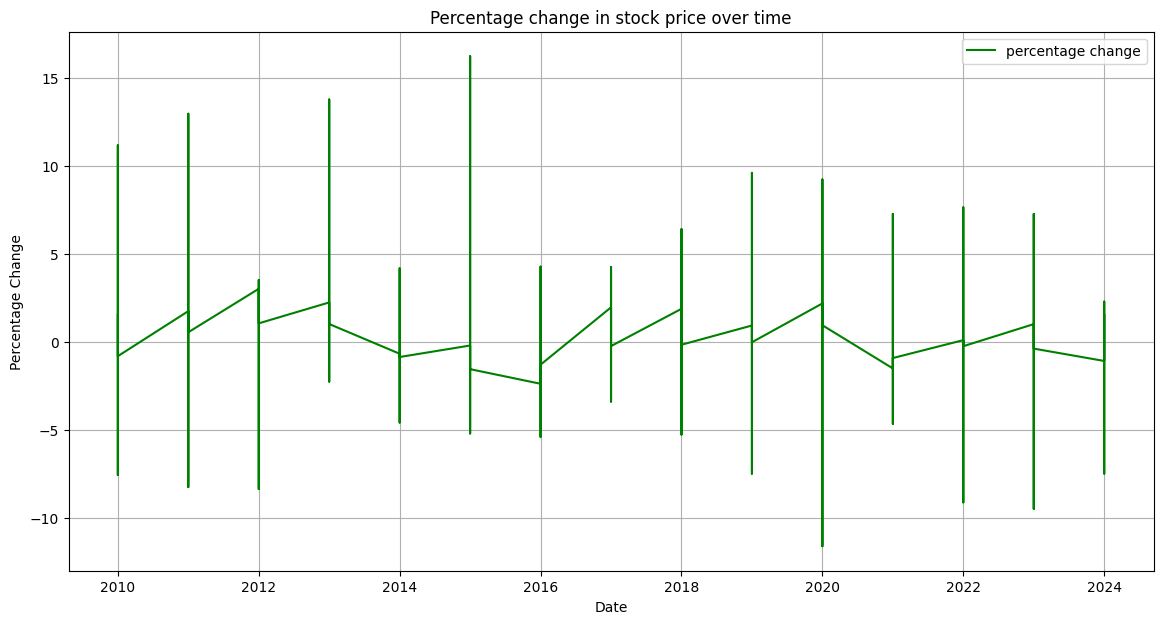

In [211]:
plt.figure(figsize=(14, 7))
plt.plot(df['Year'], df['pct_change'], label='percentage change', color='green')
plt.title('Percentage change in stock price over time')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()


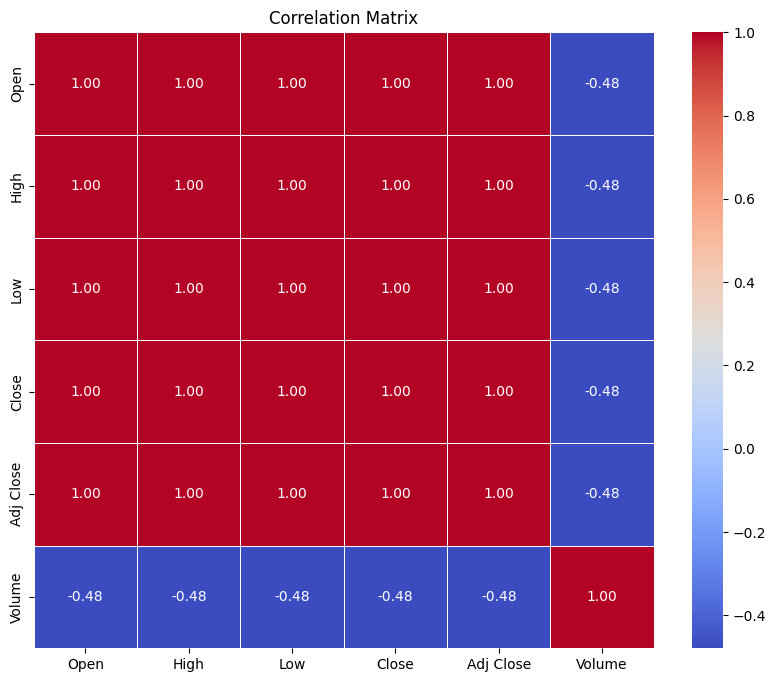

In [212]:
# Compute correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


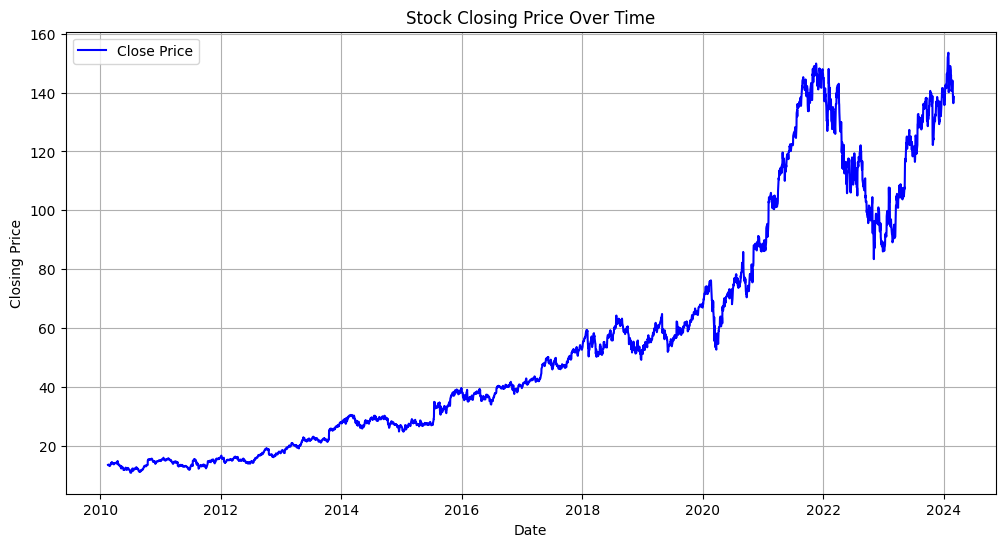

In [213]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [214]:
# Extract month as number
df['Month'] = df['Date'].dt.month


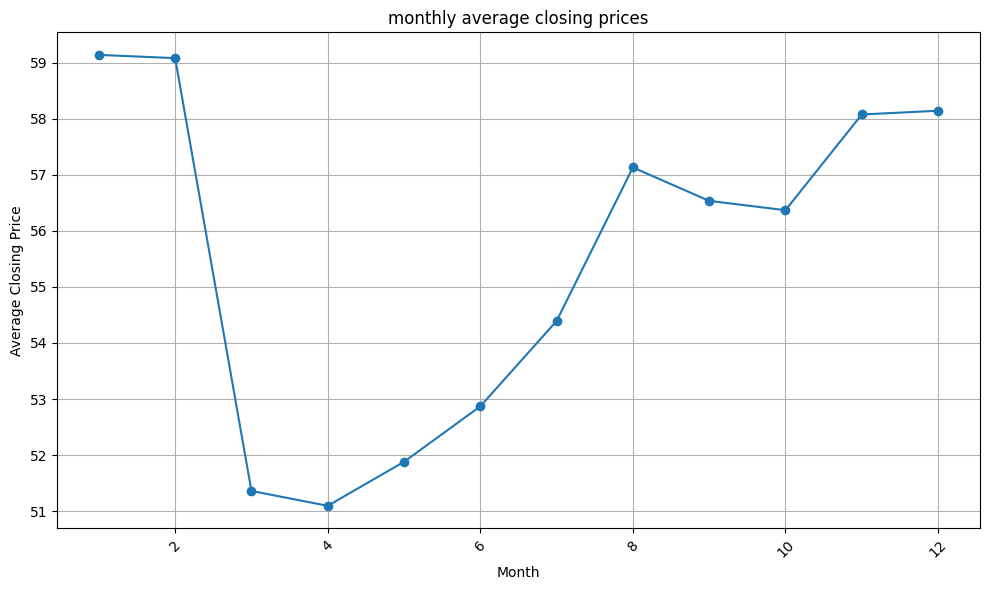

In [215]:
# Calculate monthly average closing prices
monthly_avg_close = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10, 6))
monthly_avg_close.plot(kind='line', marker='o')
plt.title('monthly average closing prices')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

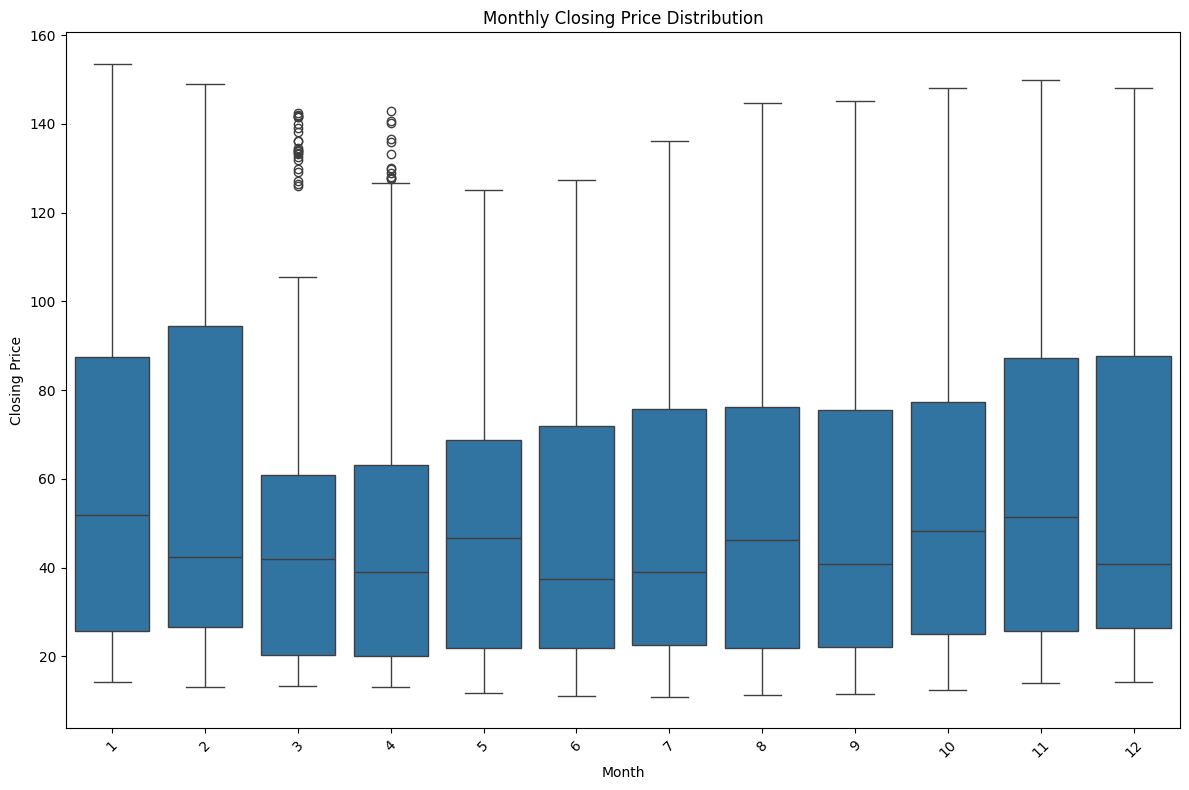

In [216]:
# Box plot for monthly closing price distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='Close', data=df)
plt.title('Monthly Closing Price Distribution')
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

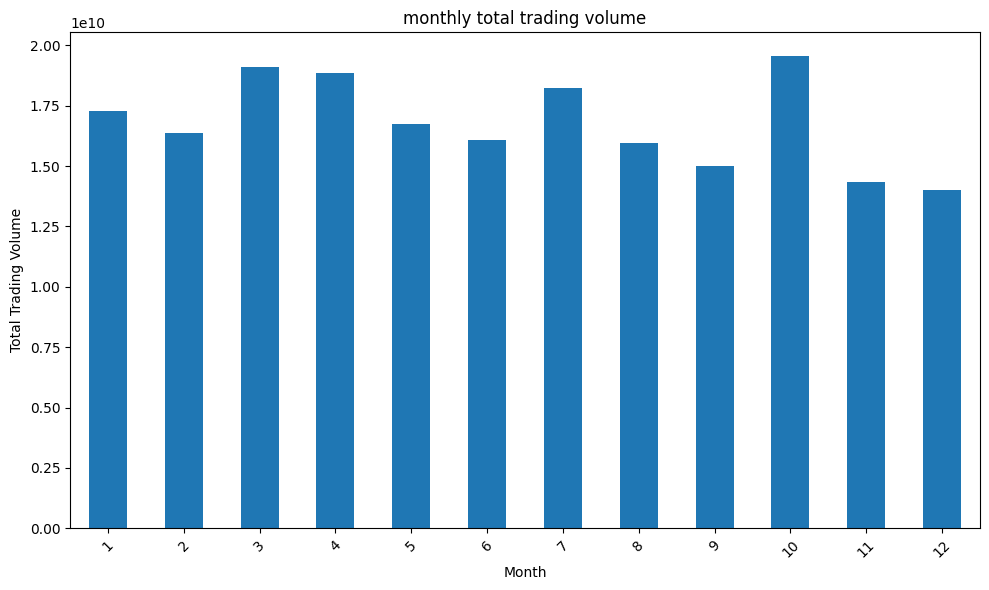

In [217]:
# Calculate monthly total trading volume
monthly_total_volume = df.groupby('Month')['Volume'].sum()

plt.figure(figsize=(10, 6))
monthly_total_volume.plot(kind='bar')
plt.title('monthly total trading volume')
plt.xlabel('Month')
plt.ylabel('Total Trading Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# DATA PREPARATION FOR MODELING
## Feature Selection
### First, we need to create a target variable that represents the class you want to predict. Since the project requires a classification model. We will create a binary target:
### 1 if the stock price is going to increase the next day.
### 0 if the stock price is going to decrease or stay the same.

In [218]:
# Calculate the difference and shift it
df['Price_Change'] = df['Close'].diff().shift(-1)  
df['Target'] = (df['Price_Change'] > 0).astype(int) 
# 1 if price increases, 0 if not

# Drop the rows where Price_Change is NaN (the last row)
df.dropna(subset=['Price_Change'], inplace=True)


### We will be using the following fatures:Open, High, Low, Volume, Adj Close, Month and we'll be predicting the Target feature.

In [219]:
features = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Month']
X = df[features]
y = df['Target']

## Splitting the Data
### Since this is time series data, it’s important to split the data in a way that respects the chronological sequence.

In [220]:
# Time-based splitting (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# MODEL SELECTION
### I amgoing to be trying a few models and find the most suitable one for the prediction.

## Lgistic regression

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.5190947666195191
Confusion Matrix:
[[  0 340]
 [  0 367]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       340
           1       0.52      1.00      0.68       367

    accuracy                           0.52       707
   macro avg       0.26      0.50      0.34       707
weighted avg       0.27      0.52      0.35       707



c:\Users\Miry\Documents\data-science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Miry\Documents\data-science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Miry\Documents\data-science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

### The accuracy of the logistic regression is ok but the model does not perfome wellon class 0

## Random Forest

In [222]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_confusion = confusion_matrix(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {rf_accuracy}')
print('Confusion Matrix:')
print(rf_confusion)
print('Classification Report:')
print(rf_classification_report)


Random Forest Accuracy: 0.4681753889674682
Confusion Matrix:
[[222 118]
 [258 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.65      0.54       340
           1       0.48      0.30      0.37       367

    accuracy                           0.47       707
   macro avg       0.47      0.47      0.45       707
weighted avg       0.47      0.47      0.45       707



### The random forest model is better if the focus is class 0prediction. But I think class 1 prediction is more relevant.


## Gradient Boosting

In [223]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=1)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_confusion = confusion_matrix(y_test, y_pred_gb)
gb_classification_report = classification_report(y_test, y_pred_gb)

print(f'Gradient Boosting Accuracy: {gb_accuracy}')
print('Confusion Matrix:')
print(gb_confusion)
print('Classification Report:')
print(gb_classification_report)


Gradient Boosting Accuracy: 0.49787835926449786
Confusion Matrix:
[[114 226]
 [129 238]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.34      0.39       340
           1       0.51      0.65      0.57       367

    accuracy                           0.50       707
   macro avg       0.49      0.49      0.48       707
weighted avg       0.49      0.50      0.49       707



### This is the perfect model since the untuned accuracy is just ok and the class 1 predictions are impressive. I choose this model.

## HYPERPARAMETER TUNING

In [225]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

#creating the grid search object and fitting it to the training data
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 1.0}
Accuracy: 0.512022630834512
Confusion Matrix:
[[ 15 325]
 [ 20 347]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.04      0.08       340
           1       0.52      0.95      0.67       367

    accuracy                           0.51       707
   macro avg       0.47      0.49      0.37       707
weighted avg       0.47      0.51      0.39       707

